In [1]:
!pip install fastf1

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.2/151.2 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.4/61.4 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 50.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.3 MB/s eta 0:00:00
  Attempting uninstall: websockets
    Found existing installation: websockets 14.2
    Uninstalling websockets-14.2:
      Successfully uninstalled websockets-14.2


req         WARNING 	DEFAULT CACHE ENABLED! (24.0 KB) /root/.cache/fastf1
core           INFO 	Loading data for Azerbaijan Grand Prix - Race [v3.5.3]
INFO:fastf1.fastf1.core:Loading data for Azerbaijan Grand Prix - Race [v3.5.3]
req            INFO 	No cached data found for session_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for session_info. Loading data...
_api           INFO 	Fetching session info data...
INFO:fastf1.api:Fetching session info data...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for driver_info. Loading data...
INFO:fastf1.fastf1.req:No cached data found for driver_info. Loading data...
_api           INFO 	Fetching driver list...
INFO:fastf1.api:Fetching driver list...
req            INFO 	Data has been written to cache!
INFO:fastf1.fastf1.req:Data has been written to cache!
req            INFO 	No cached data found for session_status_data. 

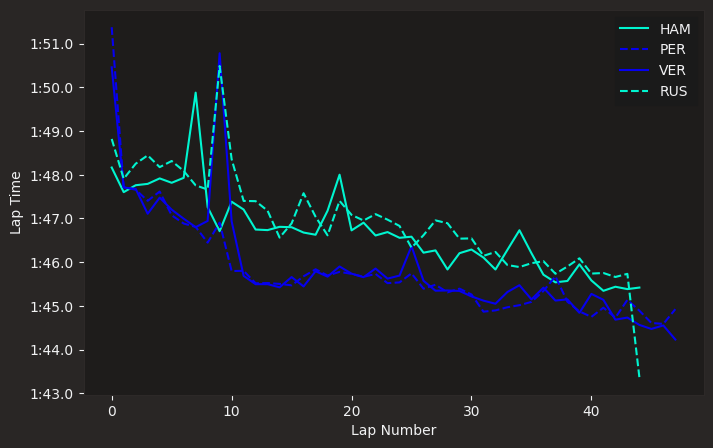

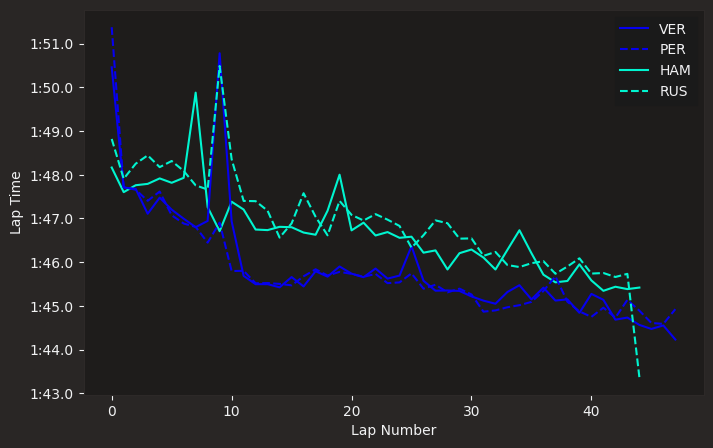

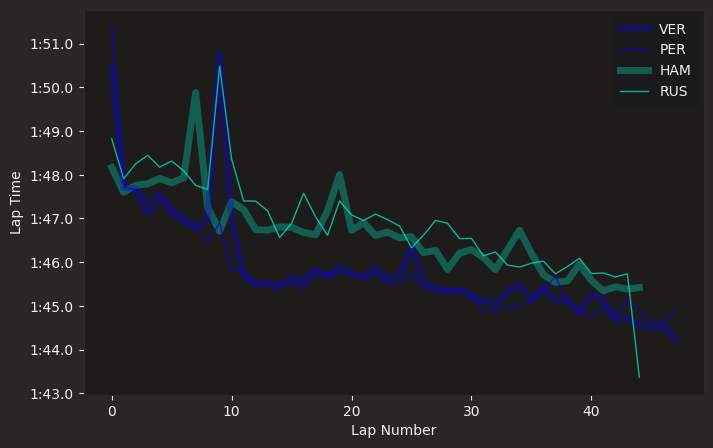

In [2]:

from matplotlib import pyplot as plt

import fastf1
from fastf1 import plotting


# Enable Matplotlib patches for plotting timedelta values and load
# FastF1's dark color scheme
fastf1.plotting.setup_mpl(mpl_timedelta_support=True, misc_mpl_mods=False,
                          color_scheme='fastf1')


###############################################################################
# Load the race session.

race = fastf1.get_session(2023, "Azerbaijan", 'R')
race.load()

###############################################################################
# Basic driver-specific plot styling
# ----------------------------------
# Plot all the laps for Hamilton, Russel, Perez and Verstappen.
# Filter out slow laps as they distort the graph axis.
# Note: as LapTime is represented by timedelta, calling ``setup_mpl`` earlier
# is required.

fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
ax.legend()

###############################################################################
# Sorting the legend
# ------------------
# That plot looks pretty good already, but the order of the labels in the
# legend is slightly chaotic. Instead of trying to order the labels manually,
# use :func:`fastf1.plotting.add_sorted_driver_legend`.
# Let's create the exact same plot again, but this time with a sorted legend
# which means, we only change the very last function call.

fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()
    style = plotting.get_driver_style(identifier=driver,
                                      style=['color', 'linestyle'],
                                      session=race)
    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plotting.add_sorted_driver_legend(ax, race)

###############################################################################
# Creating fully custom styles
# ----------------------------
# If you want to fully customize the plot style, you can define your own
# styling variants.
#
# Note that the value ``'auto'`` is treated as a magic keyword when used in
# combination with a color. It will be replaced with the team color.
#
# We define two styles, one for the first driver and one for the second driver
# in any team.
#
# The plot that is generated here isn't intended to be very readable, but it
# shows how you can customize any plot styling parameter.

my_styles = [
    # style for each first driver
    {'color': 'auto', 'linestyle': 'solid', 'linewidth': 5, 'alpha': 0.3},
    # style for each second driver
    {'color': 'auto', 'linestyle': 'solid', 'linewidth': 1, 'alpha': 0.7}
]

fig, ax = plt.subplots(figsize=(8, 5))

for driver in ('HAM', 'PER', 'VER', 'RUS'):
    laps = race.laps.pick_drivers(driver).pick_quicklaps().reset_index()

    # here, we now use ``style=my_style`` to use the custom styling
    style = plotting.get_driver_style(identifier=driver,
                                      style=my_styles,
                                      session=race)

    ax.plot(laps['LapTime'], **style, label=driver)

# add axis labels and a legend
ax.set_xlabel("Lap Number")
ax.set_ylabel("Lap Time")
plotting.add_sorted_driver_legend(ax, race)
plt.show()

Courtesy: FastF1